In [21]:
require(RJSONIO)
require(plyr)
require(tidyr)
require(ggplot2)

In [22]:
jsonData <- fromJSON('run-10.json', nullValue = NA)$data

jsonData <- lapply(jsonData, function(x) {
  x[sapply(x, is.null)] <- NA
  unlist(x)
})

interDataWide = data.frame(do.call("rbind", jsonData))

interDataWide

,stepSize,optimizationSteps,predictionSamples,regressionVariance,threshold,runtimeInMilliseconds,errors1,errors2,errors3,errors4,ellip.h,errors92,errors93,errors94,errors95,errors96,errors97,errors98,errors99,errors100,run
1,0.01,500,500,1,0.1,13259,1.514853,5.147749,5.383893,0.175375,⋯,0.1356282,0.1109365,0.1147883,0.4182837,0.2521446,0.3838679,0.4956821,0.1139186,0.4100445,1
2,0.01,500,500,1,0.1,13495,1.137887,5.062536,0.3524588,3.142781,⋯,0.1684721,0.5650392,0.3282525,0.1628731,0.2688456,0.6548741,0.4619926,0.0607373,0.077415,2
3,0.01,500,500,1,0.1,12948,4.589428,4.6159,5.581846,3.48955,⋯,0.2432116,0.008271248,0.880773,0.1645767,0.2540223,0.1422513,0.9032373,0.8630758,1.150808,3
4,0.01,500,500,1,0.1,15725,0.9771555,7.514623,3.636434,5.237597,⋯,0.006136907,0.8550712,0.1121321,0.4512314,0.2480544,0.3121038,0.5860913,0.1818351,0.9307185,4
5,0.01,500,500,1,0.1,14826,0.9449466,6.871055,3.717807,6.550157,⋯,0.1309349,0.5572998,0.003087434,0.627759,0.200191,0.4295249,0.4945113,0.5119422,0.05920918,5
6,0.01,500,500,1,0.1,12298,7.681911,2.380991,4.453573,5.112644,⋯,0.5864921,1.058078,0.2881062,0.6346516,0.3488816,0.1547987,1.75203,0.02458636,0.2061613,6
7,0.01,500,500,1,0.1,13285,3.839185,0.4582426,3.683775,0.07355604,⋯,0.5023493,0.5286154,0.01087835,0.5438385,0.8242461,0.3315017,0.2778531,0.05066894,0.1266898,7
8,0.01,500,500,1,0.1,15216,7.594045,3.388156,4.227328,3.305629,⋯,0.2052547,0.2568896,0.3353776,0.1884988,0.186518,0.1995,0.079795,0.007969762,0.306189,8
9,0.01,500,500,1,0.1,16538,1.678068,0.1145902,6.192706,3.271912,⋯,0.2142158,0.2393345,1.010162,0.9322064,0.4905468,0.04422678,0.2014526,0.03012606,0.5051484,9
10,0.01,500,500,1,0.1,13425,2.814249,3.328499,7.067062,4.757466,⋯,0.1620462,0.4819623,0.4164988,0.07924414,0.1982589,0.03138288,0.04217692,0.219477,0.3762757,10


In [23]:
interData <- gather(interDataWide, sample, error, errors1:errors100)

fixSampleColumn <- function(data){
  idx <- "sample"
  data[idx] <- lapply(data[idx], function(x) strtoi(substr(x, 7, nchar(x))))
  return(data)
}
                      
interData <- fixSampleColumn(interData)
                      
interData$run <- factor(interData$run)
                      
interData

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,stepSize,optimizationSteps,predictionSamples,regressionVariance,threshold,runtimeInMilliseconds,run,sample,error
1,0.01,500,500,1,0.1,13259,1,1,1.51485280643018
2,0.01,500,500,1,0.1,13495,2,1,1.13788691623176
3,0.01,500,500,1,0.1,12948,3,1,4.58942761531803
4,0.01,500,500,1,0.1,15725,4,1,0.977155489660255
5,0.01,500,500,1,0.1,14826,5,1,0.944946600882834
6,0.01,500,500,1,0.1,12298,6,1,7.68191095903172
7,0.01,500,500,1,0.1,13285,7,1,3.83918462248506
8,0.01,500,500,1,0.1,15216,8,1,7.59404491593776
9,0.01,500,500,1,0.1,16538,9,1,1.67806834297668
10,0.01,500,500,1,0.1,13425,10,1,2.81424912559899


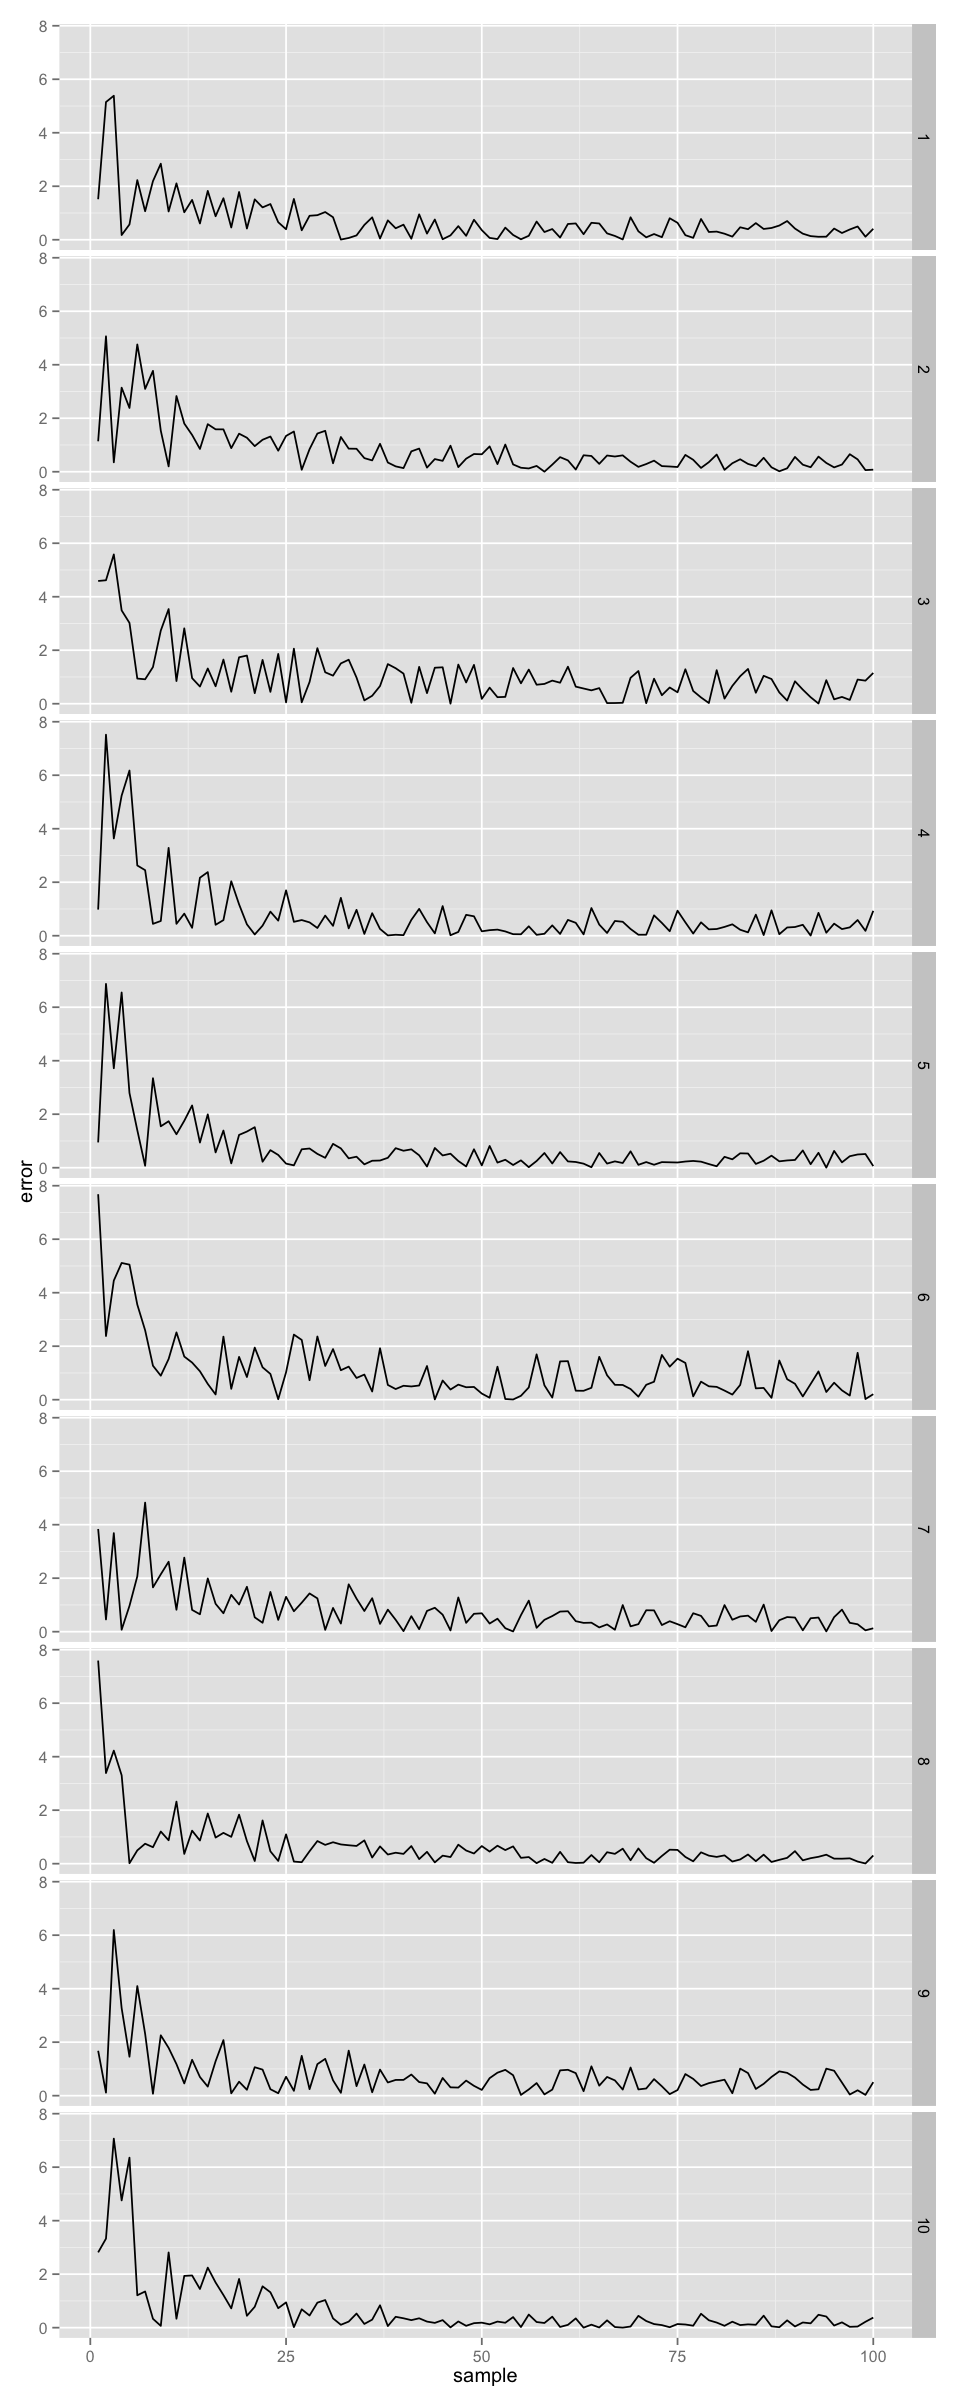

In [38]:
options(repr.plot.width=8, repr.plot.height=20)
ggplot(data = interData, aes(x=sample, y=error)) + geom_line() + facet_grid(run ~ .)

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to chang

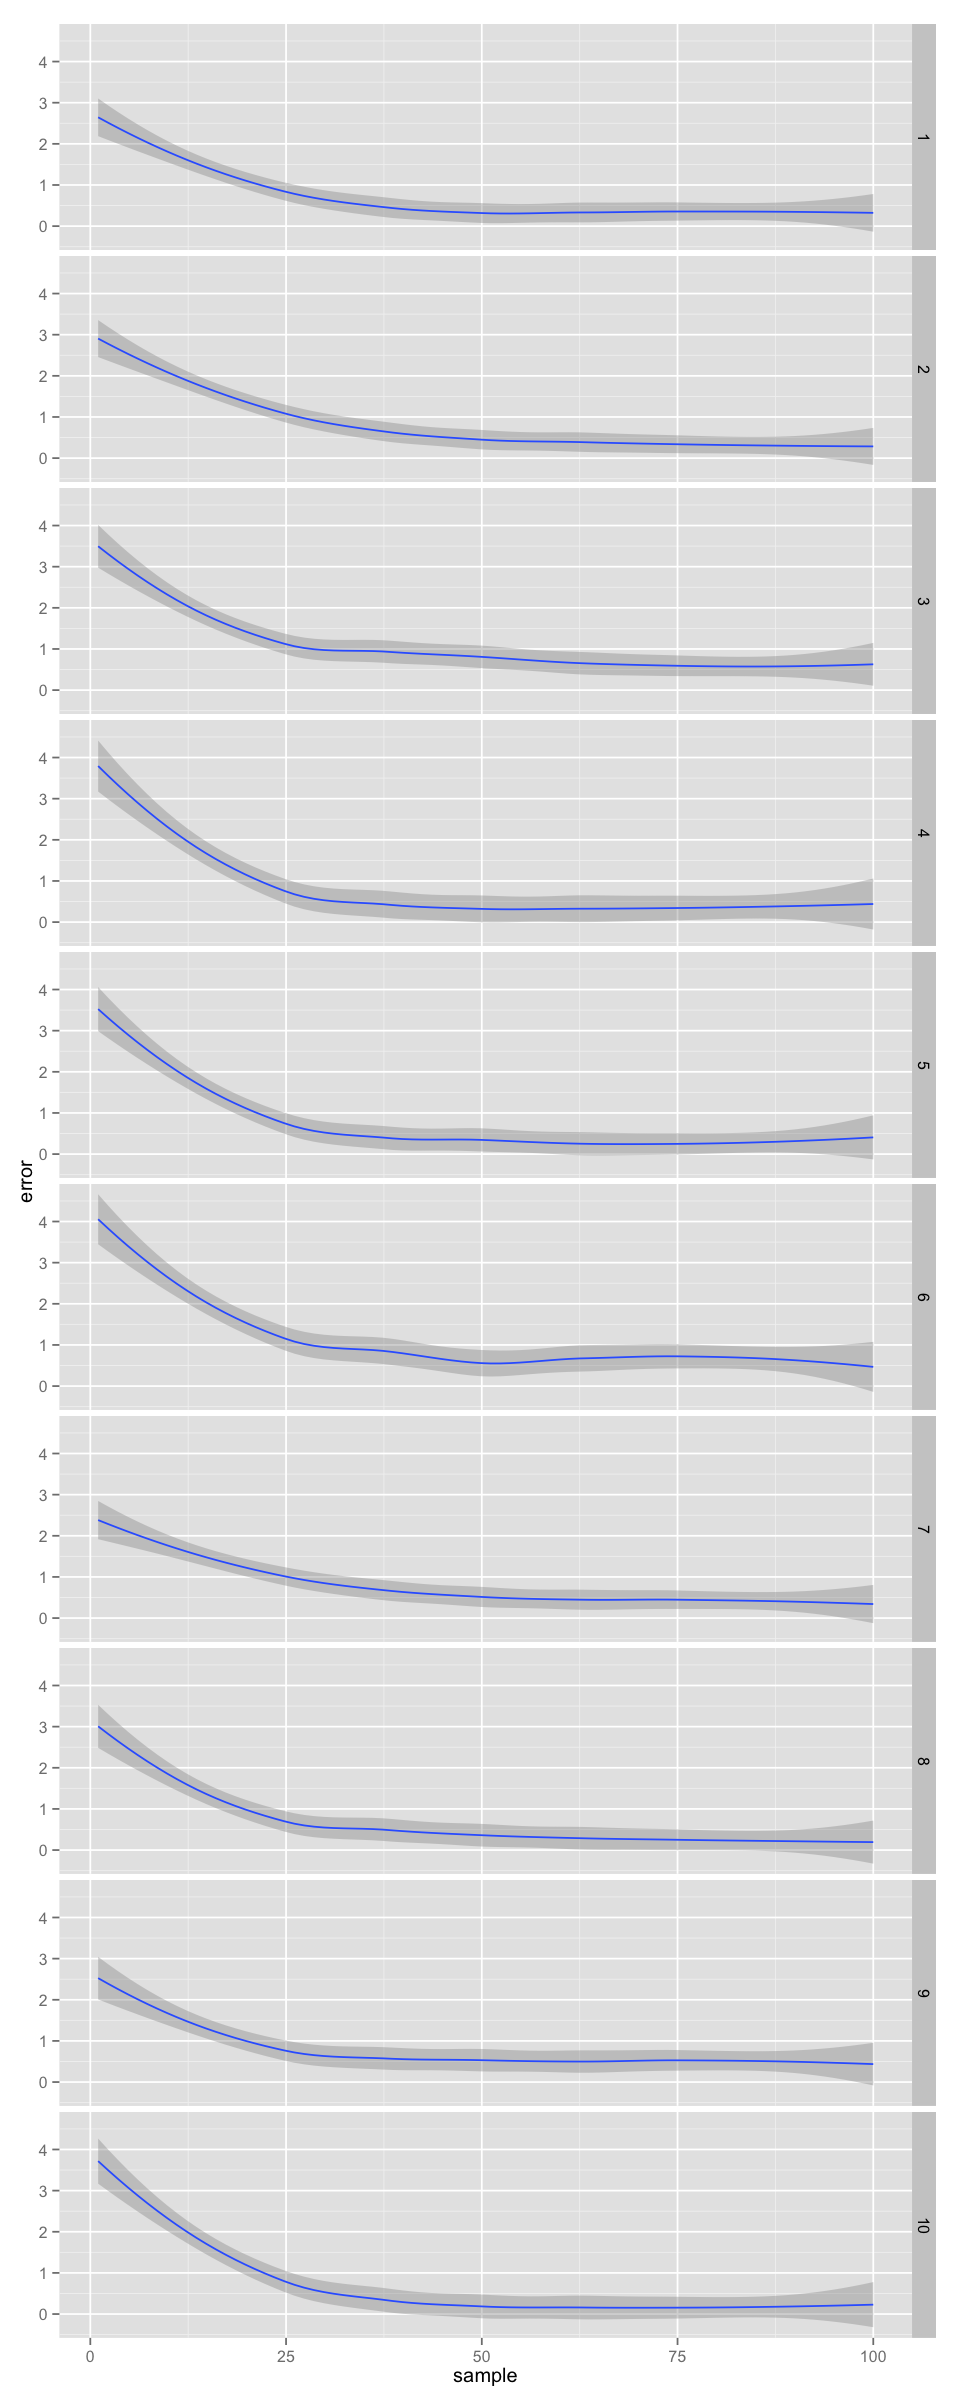

In [36]:
# ggplot(a, aes(x=x,y=y)) + geom_point() +geom_smooth()
options(repr.plot.width=8, repr.plot.height=20)
ggplot(data = interData, aes(x=sample, y=error)) + geom_smooth() + facet_grid(run ~ .)